# End to End Model Development and Deployment

Diabetics is a Chronic disease that affects millions worldwide. Particularly we are interested to analyze diabetes in female patients.

**Problem Statement**
Develop a machine learning model to predict diabtes in women and deploy it as a Web App in Streamlit

**Dataset Description**
This is the Pima Indians Dataset from kaggle.com and has data about 768 women of Pima heritage 21 years and above. This is an open source dataset. 

**Steps of the Modelling Process**
1. Import all libraries and view the data set 
2. Do the Data Sanity Check
3. Clean the data
4. Perform Exploratory Data Analysis 
5. Preprocess the data for modelling
6. Fit and evaluate Machine Learning Models
7. Optimize the best model
8. Interpret the tuned model
9. Prepare for deployment by creating a pipeline 
10. Deploy in Streamlit 

### Step1: Import libraries and the datset


In [22]:
# data manipulation and EDA libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# data preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

# data modelling libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# data metrics libraries
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

# model interpretation and deployment libraries
import shap
import pickle
from sklearn.pipeline import Pipeline
import streamlit as st

print("All libraries are imported")



All libraries are imported


In [23]:
data=pd.read_csv('diabetes.csv')

In [24]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Tested_Positive


**Attributes of the data**
1. Pregnancies- The number of times the patient was pregnant
2. Glucose- The serum glucose level of the patient
3. BloodPressure- Duastolic blood pressure(mm of Hg)
4. SkinThickness- Triceps fold skin thickness ( mm)
5. Insulin - The serum insulin level of te patient 
6. BMI- Body Mass Index ( Wt/Ht^2) is a measure of obesity
7. DiabetisPedigreeFunction- A genetic propensity towards diabtes base on family history
8. Age - Age of the patient
9. Outcome- The target variable withh two levels (Yes/No)

### Step2 : Data Sanity Check
- get the basic info of the data
- look for null values
- look for duplicate rows
- look for corrupted data
- get the data summary statistics(both numerical and categorical)
- look for erroneous values in the data 


In [25]:
# get the shape of the data 
data_shape=data.shape
print('Rows =', data_shape[0], ' Columns=', data_shape[1])

Rows = 768  Columns= 9


In [26]:
# get the basic info
info=data.info()

# get the data type
dtype=data.dtypes

info, dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


(None,
 Pregnancies                   int64
 Glucose                       int64
 BloodPressure                 int64
 SkinThickness                 int64
 Insulin                       int64
 BMI                         float64
 DiabetesPedigreeFunction    float64
 Age                           int64
 Outcome                      object
 dtype: object)

In [27]:
# check for unique levels in categorical
data['Outcome'].nunique()

4

In [28]:
# get the vakue counds
data['Outcome'].value_counts()

Outcome
No                 470
Yes                248
Tested_Negative     30
Tested_Positive     20
Name: count, dtype: int64

In [29]:
#check for nulls and duplicate 
nulls=data.isnull().sum()

dups=data.duplicated().sum()

nulls, dups

(Pregnancies                 0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 Outcome                     0
 dtype: int64,
 0)

In [30]:
# Summary statistics of numerical anad categorical data 
num_stats=data.describe().T
cat_stats=data.describe(include='O').T
num_stats, cat_stats

(                          count        mean         std     min       25%  \
 Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
 Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
 BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
 SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
 Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
 BMI                       768.0   31.992578    7.884160   0.000  27.30000   
 DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
 Age                       768.0   33.240885   11.760232  21.000  24.00000   
 
                                50%        75%     max  
 Pregnancies                 3.0000    6.00000   17.00  
 Glucose                   117.0000  140.25000  199.00  
 BloodPressure              72.0000   80.00000  122.00  
 SkinThickness              23.0000   32.00000   99.00  
 Insulin   

**Data Summary**
1. The dataset has 768 rows and 9 columns
2. The dataset has 8 numerical varibles ( int64 and float64) and one categorical variable (Ouctome)
3. **The categorical variable Outcome has 4 levels which we need to clean and reduce to 2 levels (Yes=1 /No=0)**
3. There are no missing values or duplicate rows
4. There are no corrupt characters in the data
5. **There are many columns which have minimun vaue as 0 , that is physiologically not feasible, so we have ti impute them with column medians** 

### Step3: Data cleaning Step
- encode categorical Outcome variable
- impute columns with minimum value 0

In [31]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [32]:
# create a copy of the data
df=data.copy()

In [33]:
# imputing the 0 values
cols=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
zerofill=lambda x: x.replace(0, x.median())
df[cols]=df[cols].apply(zerofill, 0)

In [34]:
#check the minimum values
df[df.columns[:]].agg('min')

Pregnancies                     0
Glucose                        44
BloodPressure                  24
SkinThickness                   7
Insulin                      14.0
BMI                          18.2
DiabetesPedigreeFunction    0.078
Age                            21
Outcome                        No
dtype: object

In [35]:
# categorical encoding
d={
    'Yes':1,'Tested_Positive':1, 'No':0, 'Tested_Negative':0
}
df['Outcome']=df["Outcome"].map(d)
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### Step4: Exploratory Data Analysis 
- univariate analysis
   - numerical data - histograms and boxplots
   - categorical data - bar plots
- Bivariate analysis
   - bivariate bar charts
   - scatter plots
- Correlation analyis
   - Correlation matrix and heatmaps

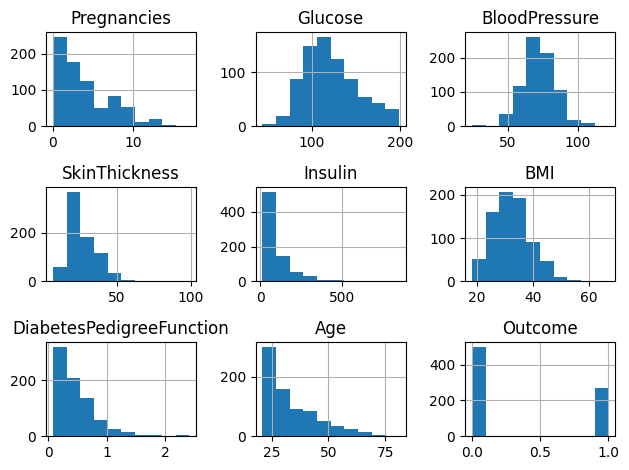

In [36]:
# Univariate analyis for numerical data 
df.hist()
plt.tight_layout()
plt.show()

In [37]:
# create individual box plots and histplots
def histplot_boxplot(data, feature, figsize=(12, 7), bins=None):
    print("Univarites for ...", feature)
    fig, (ax_box, ax_hist)=plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw={'height_ratios':(0.25, 0.75)},
    figsize=figsize)
    sns.boxplot(data=data, x=feature, color='violet', ax=ax_box, showmeans=True)
    sns.histplot(data=data, x=feature, ax=ax_hist, bins=bins ) if bins else sns.histplot(data=data, x=feature, ax=ax_hist)
    plt.axvline(data[feature].mean(), color='green', linestyle='--')
    plt.axvline(data[feature].median(), color='black', linestyle='-')
    plt.show()

Univarites for ... Pregnancies


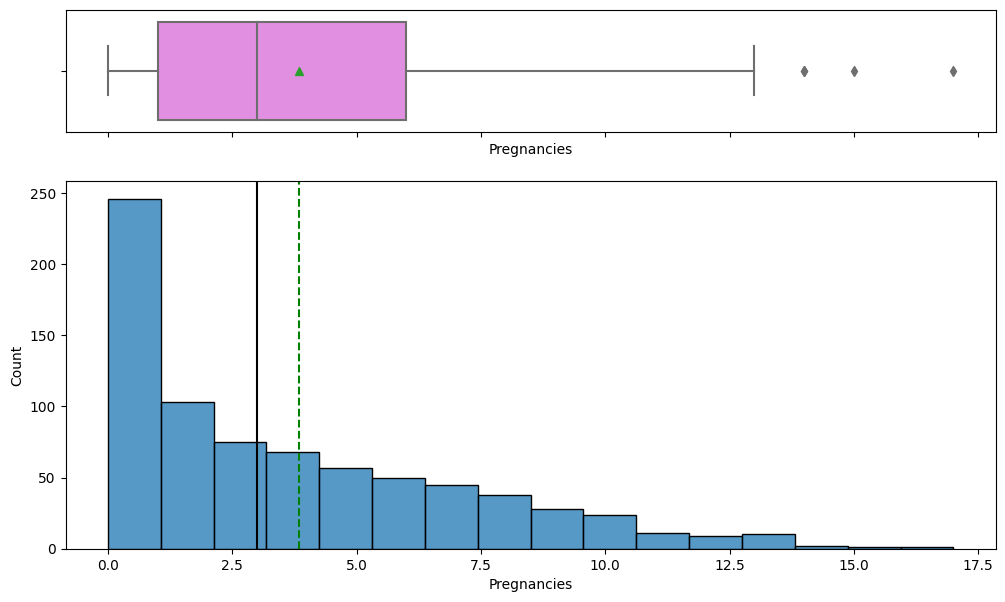

Univarites for ... Glucose


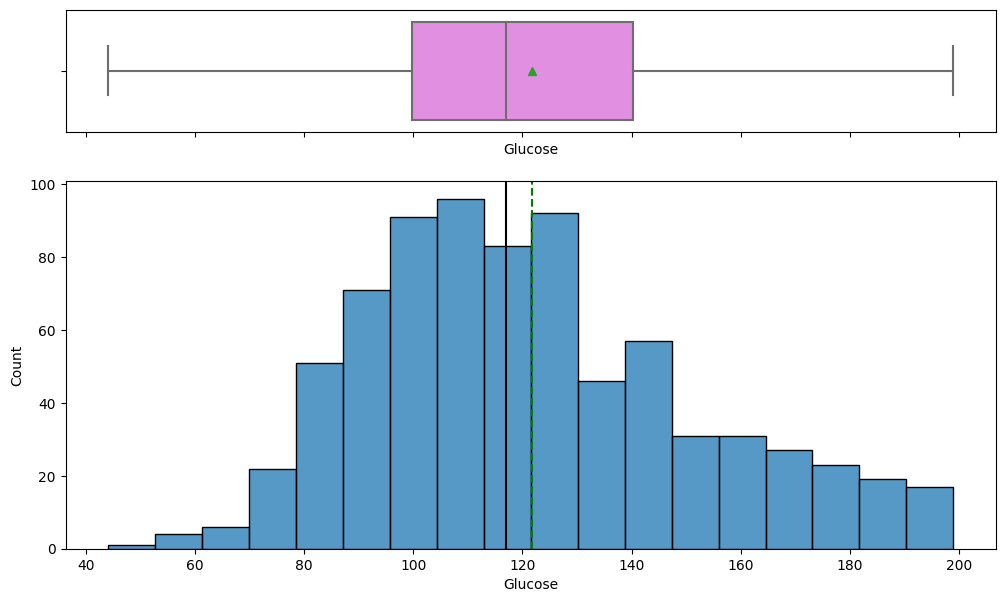

Univarites for ... BloodPressure


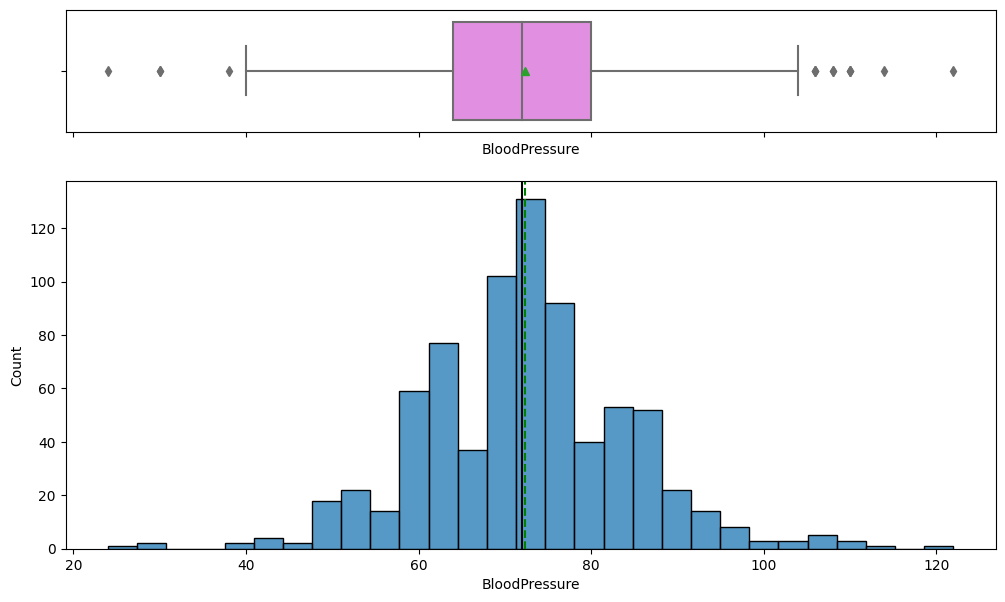

Univarites for ... SkinThickness


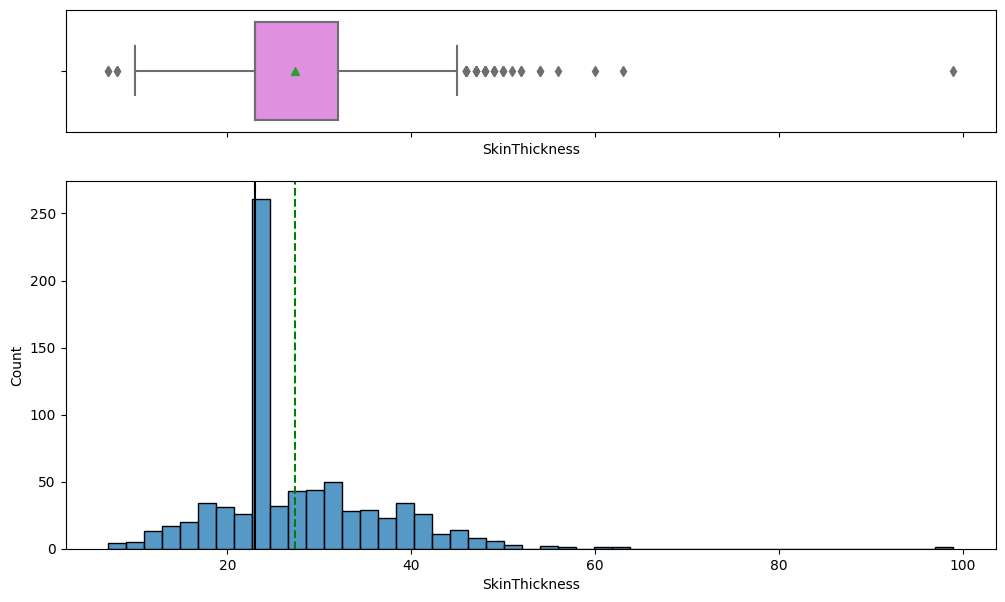

Univarites for ... Insulin


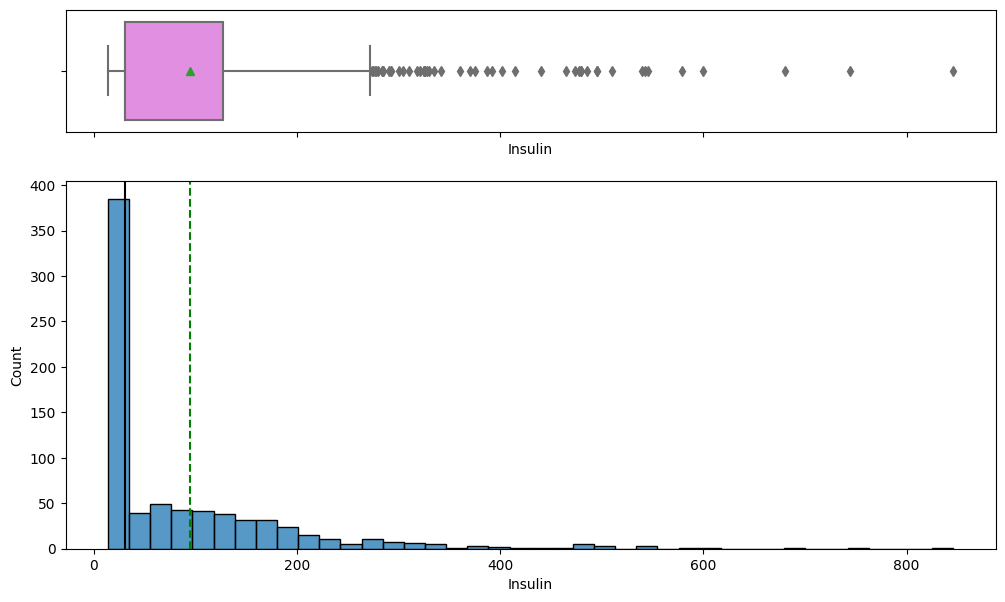

Univarites for ... BMI


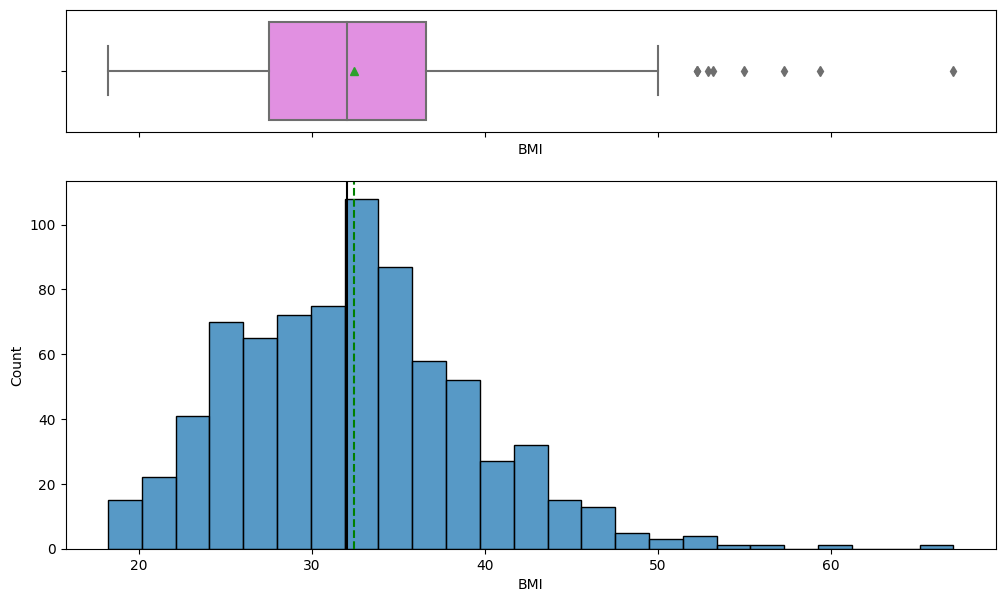

Univarites for ... DiabetesPedigreeFunction


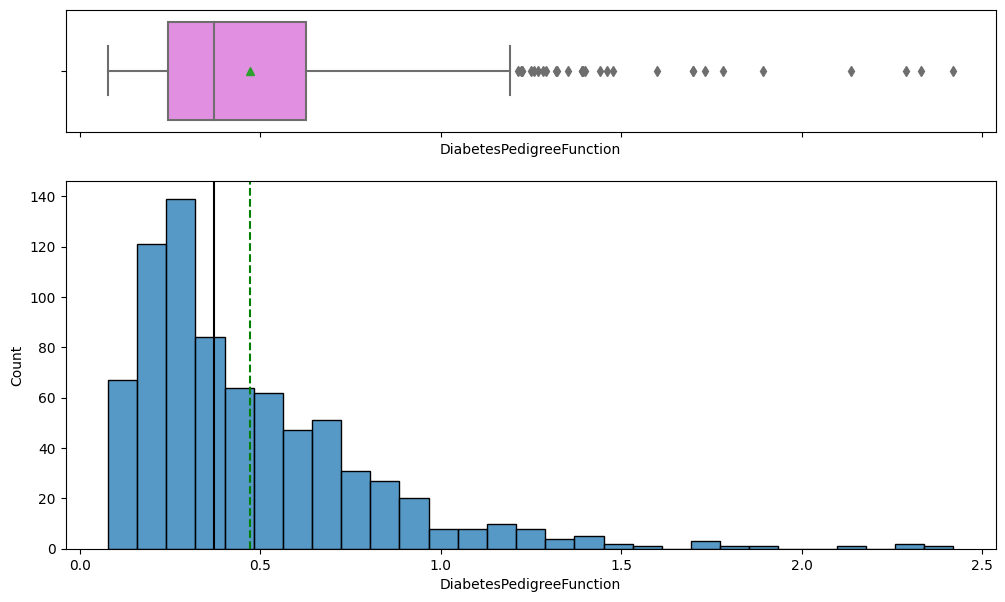

Univarites for ... Age


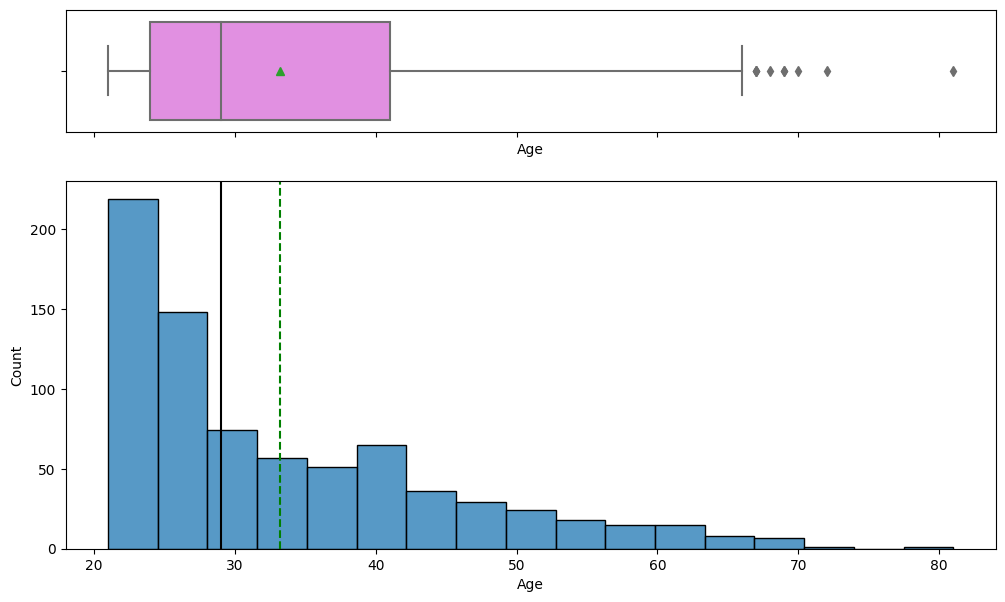

Univarites for ... Outcome


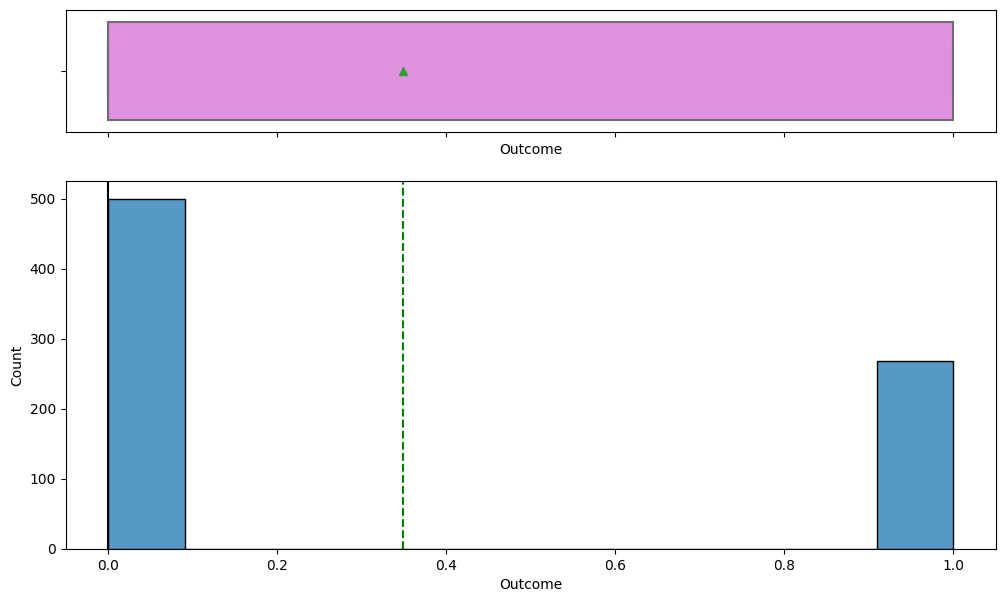

In [38]:
for col in df.select_dtypes(exclude='O').columns:
    histplot_boxplot(data=df, feature=col)

In [39]:
num_outliers={}
for col in df.columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    outliers=((df[col]< (q1-1.5*iqr)) | (df[col]>(q3+1.5*iqr)))
    num_outliers[col]=outliers.sum()
num_outliers

{'Pregnancies': 4,
 'Glucose': 0,
 'BloodPressure': 14,
 'SkinThickness': 35,
 'Insulin': 49,
 'BMI': 8,
 'DiabetesPedigreeFunction': 29,
 'Age': 9,
 'Outcome': 0}

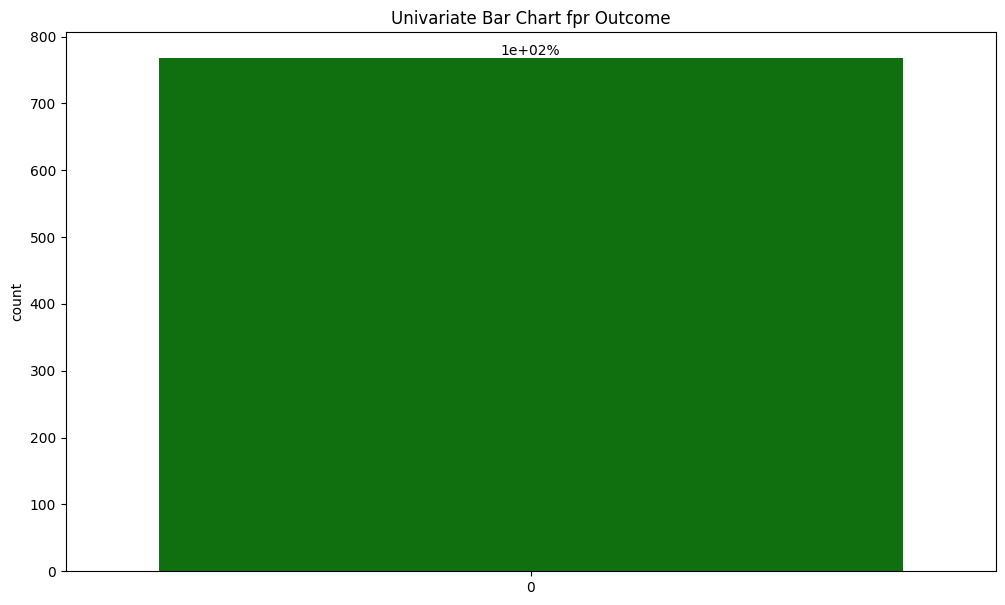

In [40]:
# univariate barchart for categorical Outcome
plt.figure(figsize=(12,7))
ax=sns.countplot(df['Outcome'], color='green' )
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate("{:.2g}%".format(100.*y/len(df)), (x.mean(), y), ha='center', va='bottom')
plt.title('Univariate Bar Chart fpr Outcome')
plt.show()

**Bivariate Analysis**
- bivarite bar graph

In [41]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Bivariates between Outcome and Pregnancies


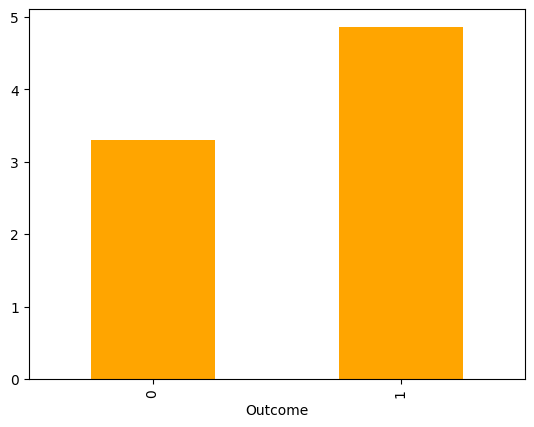

Bivariates between Outcome and Glucose


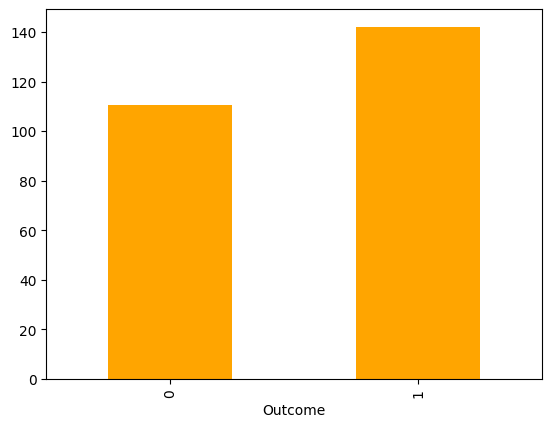

Bivariates between Outcome and BloodPressure


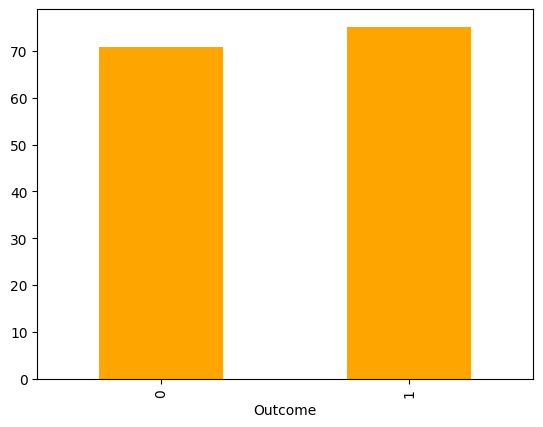

Bivariates between Outcome and SkinThickness


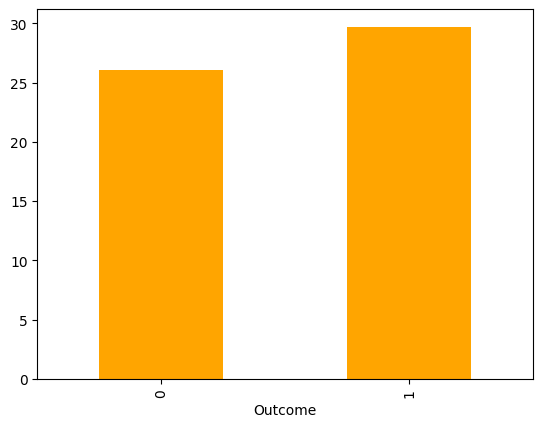

Bivariates between Outcome and Insulin


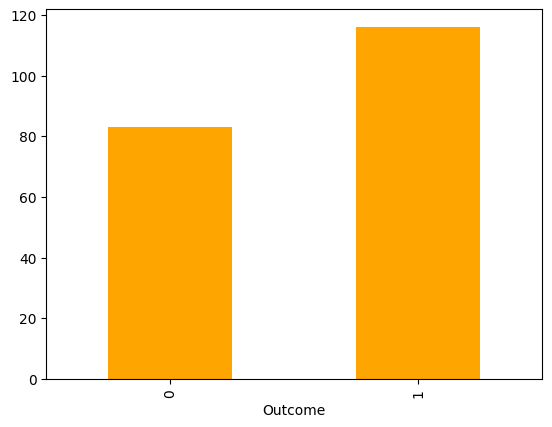

Bivariates between Outcome and BMI


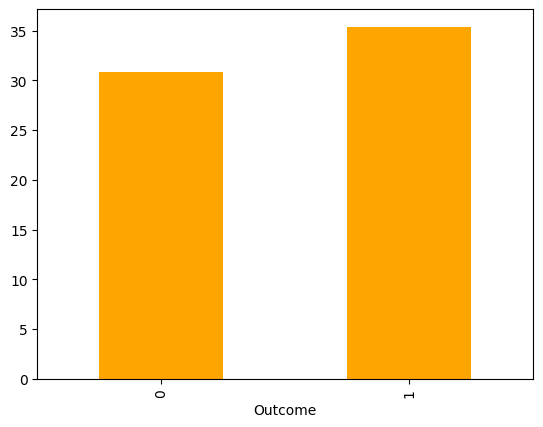

Bivariates between Outcome and DiabetesPedigreeFunction


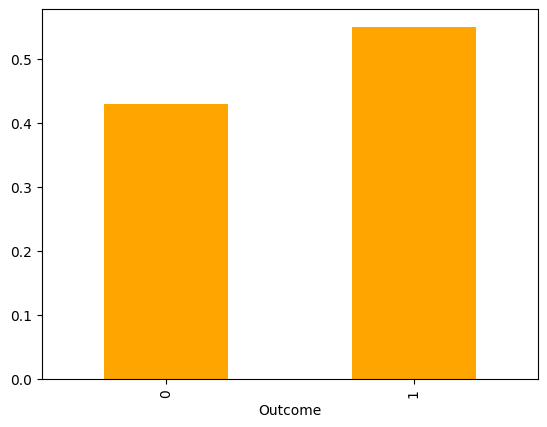

Bivariates between Outcome and Age


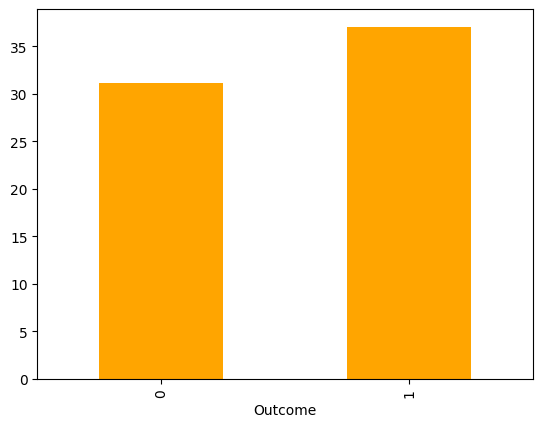

In [42]:
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols:
    print("Bivariates between Outcome and {}".format(col))
    df.groupby('Outcome')[col].mean().plot(kind='bar', color='orange')
    plt.show()

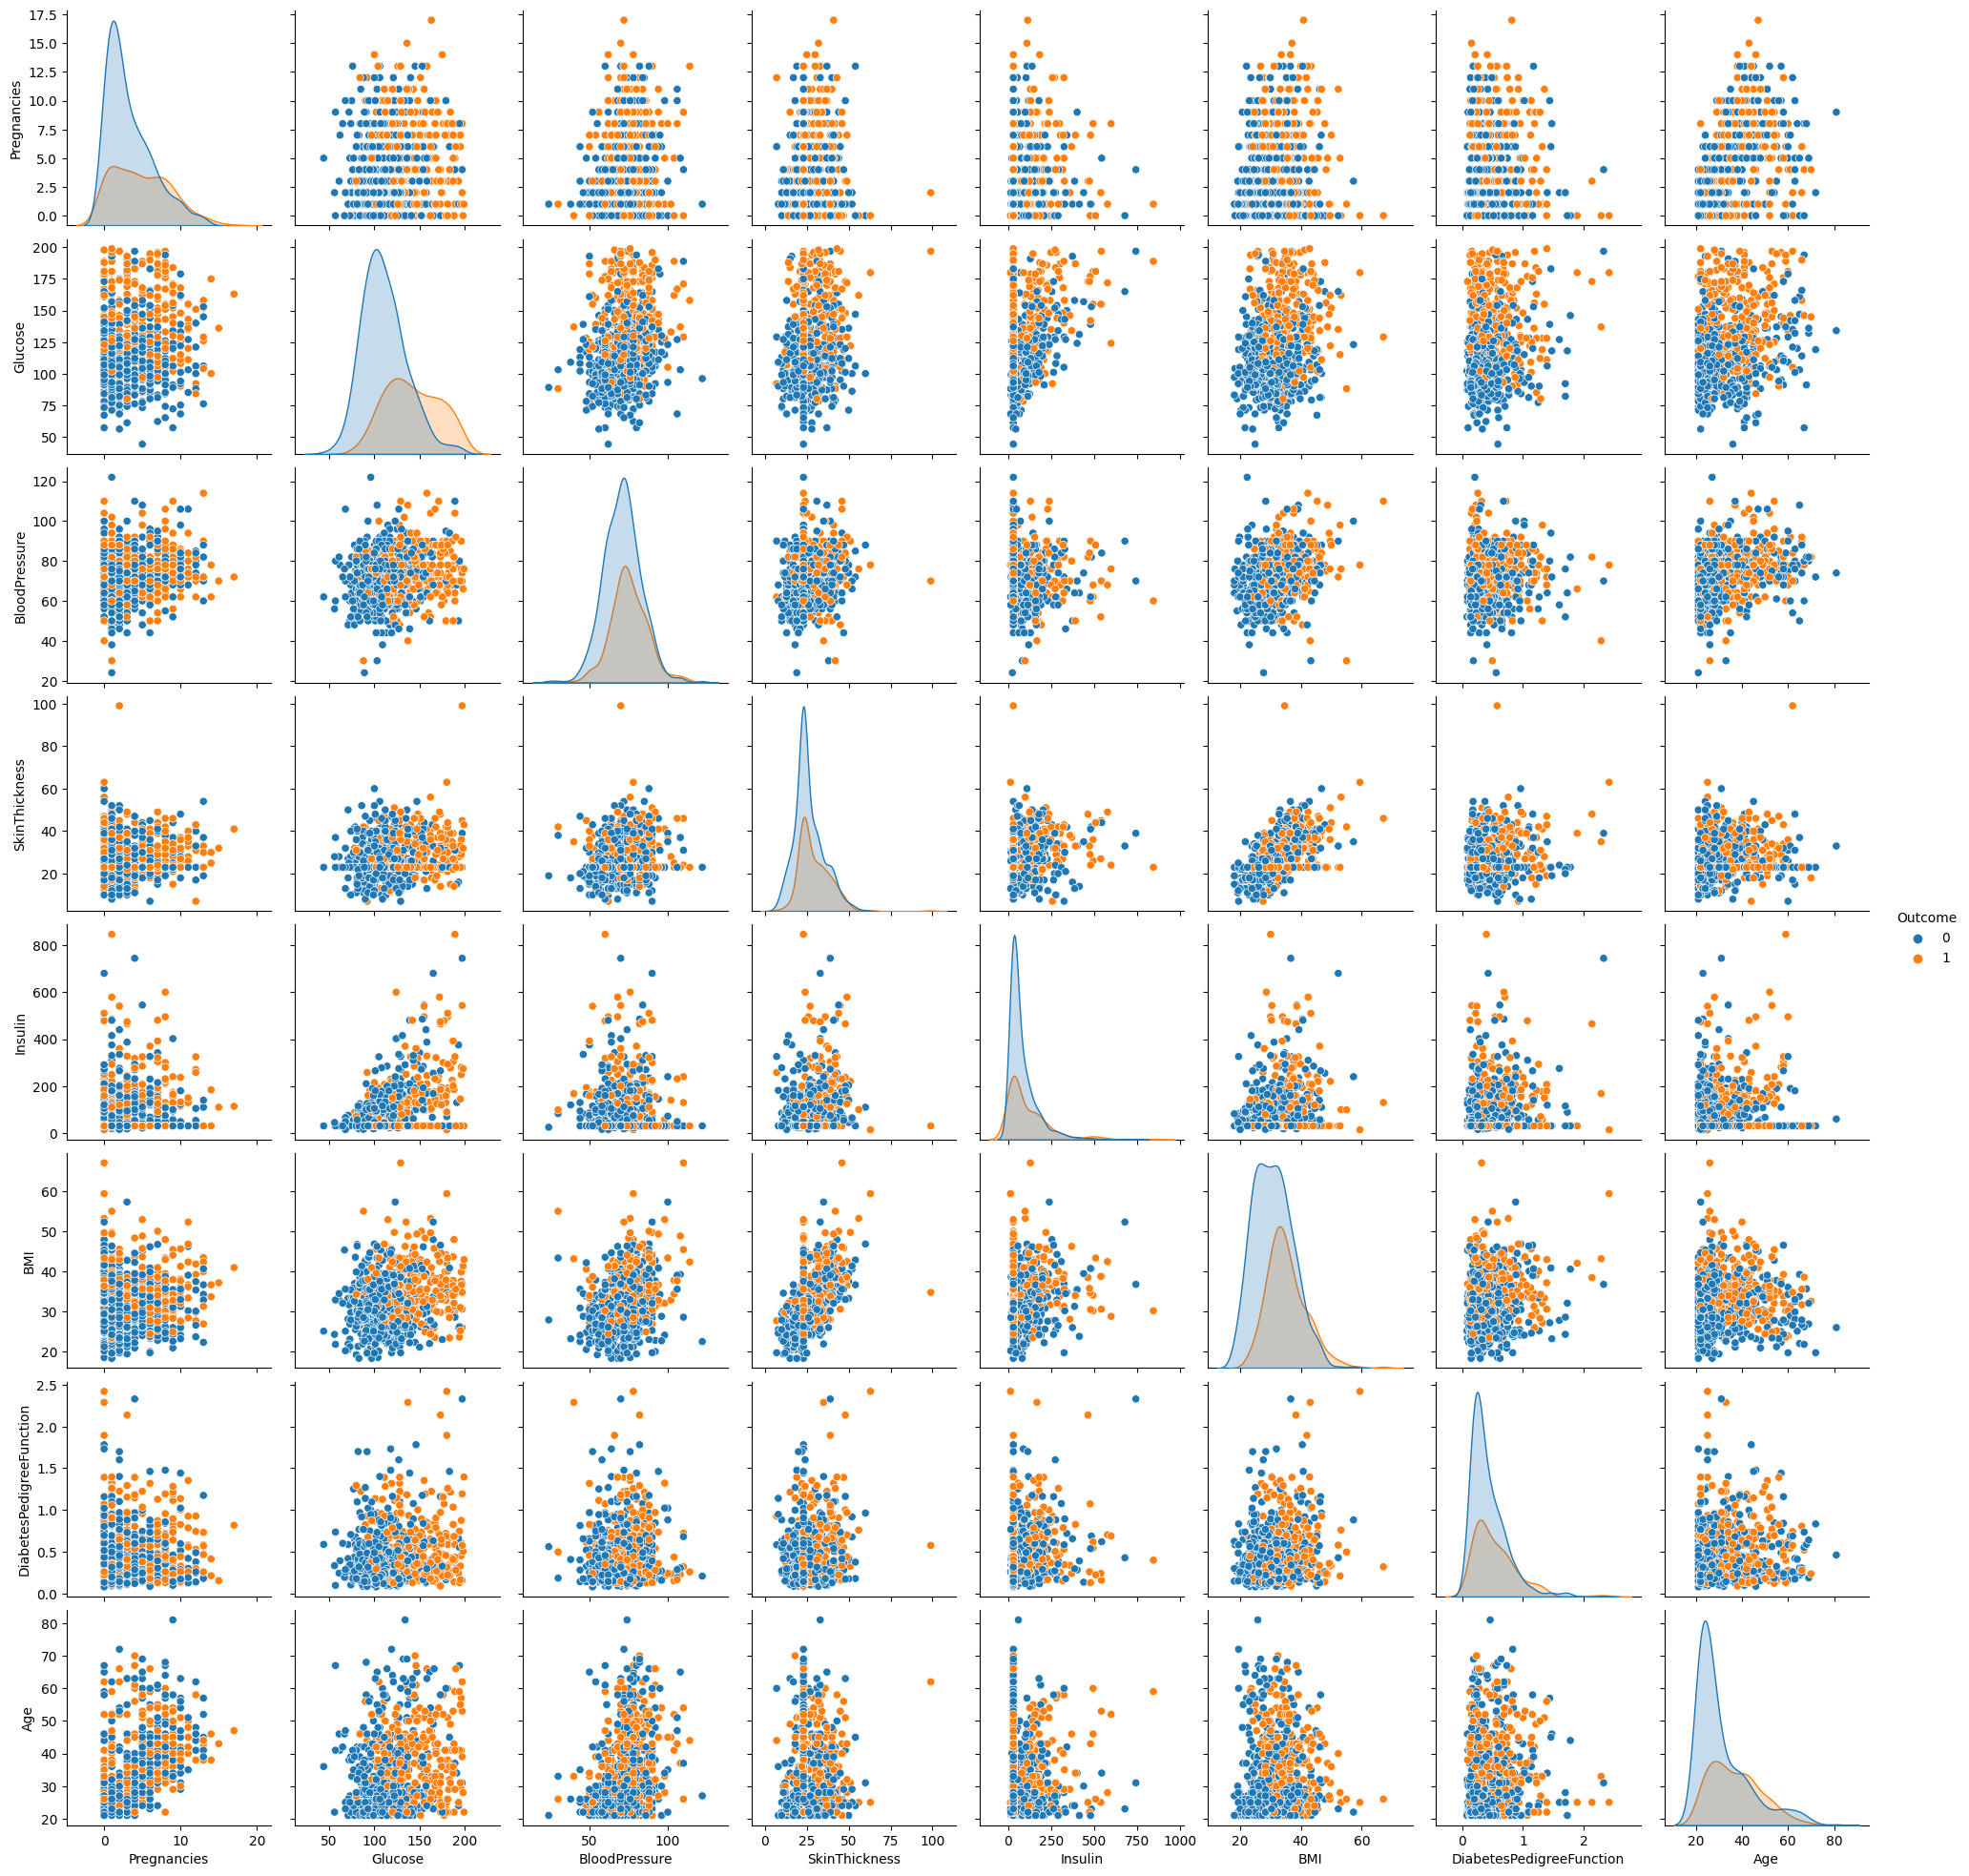

In [43]:
# pairplot
sns.pairplot(df, hue='Outcome')

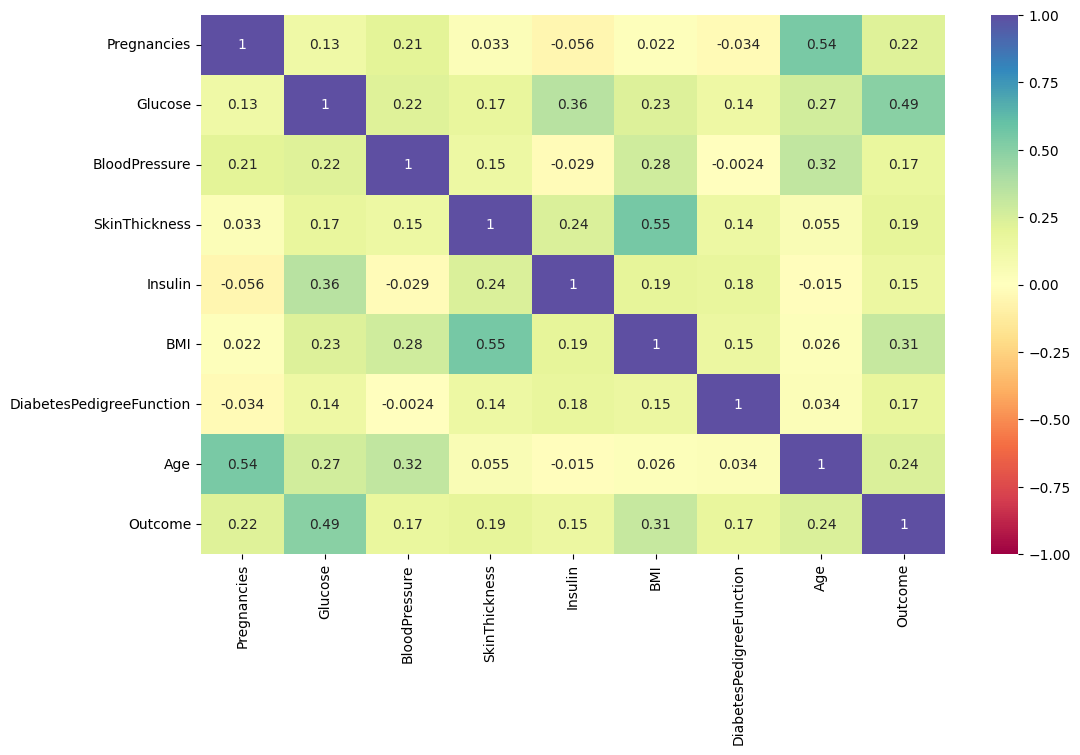

In [44]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap='Spectral', vmax=+1, vmin=-1)
plt.show()

**Observations**
1. Pregnancies , insulin, DiabetesPedigreeFunction and age are rights skewed
2. BloodPressure, Insulin, SkinThickness , Diabetes predigree function had many outliers
3. Outliers counts have been obtained but we will not resolve these outliers
4. The Outcome variable is highly imbalanced with 65% having diabetes and 35% not having diabetes
5. Women with higher Pregnancies, Glucose, BMI, Age, Diabetes Pedigree Function are more prone to diabetes. To confirm this we will use pairplots an heatmaps.
6. Base on KDE plots the distributions of Pregnancies,Glucose, Age, Diabetes Pedigree Function are much different for the two outcome classes showing that they are risk factors of diabtes
7. Scatter plots show strong positive trend between Glucose and Insulin, Glucose and BMI, Glucose and age. These may be risk factors of diabetes. We confirm with a heatmap
8. Heatmap shows that Glucose, BMI and Age are risk factors of Diabetes

### Step5: Data Preprocessing

In [48]:
def preprocess(df,label):
    # separate features and label
    X=df.drop('Outcome',axis=1)
    y=df['Outcome']
    # solve for data imbalance
    sm=SMOTE()
    X,y=sm.fit_resample(X,y)
    # train-test-split
    xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2,random_state=42,stratify=y)
    return xtrain,xtest,ytrain,ytest

In [49]:
xtrain,xtest,ytrain,ytest=preprocess(df,label='Outcome')

In [50]:
# scale the features
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [51]:
# we have preprocessed the data

#### Step 6 - FIT AND EVALUATE VARIOUS ML ALGORITHMS

In [55]:
# create a metrics function
def print_metrics(ytest,ypred,model_name):
    print('Metrics for model...',model_name)
    print('')
    print('Accuracy Score =',accuracy_score(ytest,ypred))
    print('')
    print('Recall Score =',recall_score(ytest,ypred))
    print('')
    print('Precision Score =',precision_score(ytest,ypred))
    print('')
    print('F1 Score =',f1_score(ytest,ypred))
    print('')
    print('ROC AUC Score =',roc_auc_score(ytest,ypred))
    print('')
    print('Confusion Matrix =')
    print(confusion_matrix(ytest,ypred))
    print('')
    print('Classification Report =')
    print(classification_report(ytest,ypred))




In [57]:
# let's fit and evaluate a KNN model
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
print_metrics(ytest,ypred,knn)

Metrics for model... KNeighborsClassifier()

Accuracy Score = 0.76

Recall Score = 0.81

Precision Score = 0.7363636363636363

F1 Score = 0.7714285714285715

ROC AUC Score = 0.76

Confusion Matrix =
[[71 29]
 [19 81]]

Classification Report =
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       100
           1       0.74      0.81      0.77       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



In [60]:
plt.style.use('fivethirtyeight')

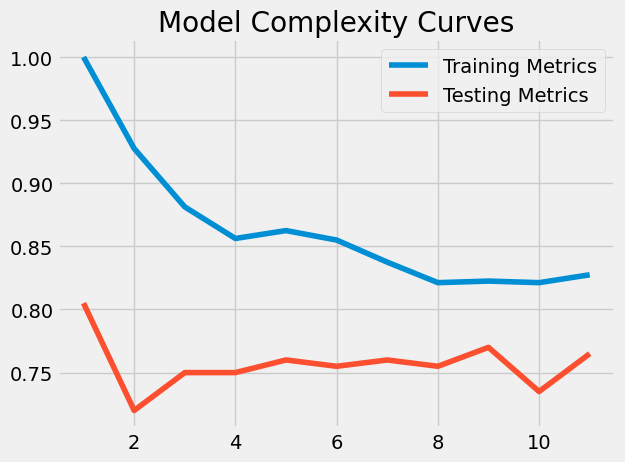

In [63]:
# Let's optimize the neighbors to improve by drawing model complexity curve
neighbors=np.arange(1,12)
train_accuracies=np.empty(len(neighbors))
test_accuracies=np.empty(len(neighbors))

# enumerate over the neighbors
plt.title('Model Complexity Curves')
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    train_accuracies[i]=knn.score(xtrain,ytrain)
    test_accuracies[i]=knn.score(xtest,ytest)
# plot the model complexity curves
plt.plot(neighbors,train_accuracies,label='Training Metrics')
plt.plot(neighbors,test_accuracies,label='Testing Metrics')
plt.legend()
plt.show()

In [64]:
# refit knn with k=9
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
print_metrics(ytest,ypred,knn)

Metrics for model... KNeighborsClassifier(n_neighbors=9)

Accuracy Score = 0.77

Recall Score = 0.85

Precision Score = 0.7327586206896551

F1 Score = 0.787037037037037

ROC AUC Score = 0.77

Confusion Matrix =
[[69 31]
 [15 85]]

Classification Report =
              precision    recall  f1-score   support

           0       0.82      0.69      0.75       100
           1       0.73      0.85      0.79       100

    accuracy                           0.77       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.77      0.77       200



In [90]:
# There is only a marginal increase in F1 Score.
# Fit all models together to get the best model to optimize
clfs={
    'logreg':LogisticRegression(),
    'knn':KNeighborsClassifier(),
    'naive bayes':GaussianNB(),
    'decision tree':DecisionTreeClassifier(),
    'rfc':RandomForestClassifier(),
    'ABC':AdaBoostClassifier(),
    'GBC':GradientBoostingClassifier(),
    'svm':SVC(),
    'xgb':XGBClassifier()
}
models_report=pd.DataFrame(columns=['Model Name','Accuracy','Recall','Precision','F1 Score'])

In [91]:
for clf,clf_name in list(zip(clfs.values(),clfs.keys())):
    clf.fit(xtrain,ytrain)
    ypred=clf.predict(xtest)
    print('Fitting the model...',clf_name)
    t=pd.Series({
        'Model Name':clf_name,'Accuracy':accuracy_score(ytest,ypred),'Recall':recall_score(ytest,ypred),'Precision'
        :precision_score(ytest,ypred),'F1 Score':f1_score(ytest,ypred)
    })
    models_report=pd.concat([t,models_report],ignore_index=True,axis=1)
#models_report=models_report.sort_values(by='F1 Score',ascending=False)
print(models_report)

Fitting the model... logreg
Fitting the model... knn
Fitting the model... naive bayes
Fitting the model... decision tree
Fitting the model... rfc
Fitting the model... ABC
Fitting the model... GBC
Fitting the model... svm
Fitting the model... xgb
                  0         1         2        3         4              5   \
Model Name       xgb       svm       GBC      ABC       rfc  decision tree   
Accuracy       0.805      0.79     0.795    0.795     0.805          0.735   
Recall          0.85       0.8      0.85     0.79      0.85           0.74   
Precision   0.779817  0.784314  0.765766  0.79798  0.779817       0.732673   
F1 Score    0.813397  0.792079  0.805687  0.79397  0.813397       0.736318   

                     6         7         8    9    10   11   12   13  
Model Name  naive bayes       knn    logreg  NaN  NaN  NaN  NaN  NaN  
Accuracy           0.69      0.76      0.75  NaN  NaN  NaN  NaN  NaN  
Recall             0.66      0.81      0.76  NaN  NaN  NaN  NaN  NaN  
P

In [94]:
rfc=RandomForestClassifier(random_state=0)
rfc.fit(xtrain,ytrain)
ypred=rfc.predict(xtest)
#print(print_metrics(rfc,ytest,ypred))
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81       100
           1       0.79      0.88      0.83       100

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



In [95]:
# check for overfitting
train_acc=rfc.score(xtrain,ytrain)
test_acc=rfc.score(xtest,ytest)
train_acc,test_acc

(1.0, 0.82)

In [98]:
from sklearn.model_selection import RandomizedSearchCV
param_dict={
    'n_estimators':range(100,1000,50),
    'min_samples_leaf':range(1,5,1),
    'min_samples_split':range(2,10,2),
    'max_depth':range(10,100,5),
    'max_features':['auto','sqrt','log2'],
    'criterion':['gini','entropy']
}
n_folds=10
rs=RandomizedSearchCV(estimator=rfc,param_distributions=param_dict,random_state=0,n_jobs=-1,n_iter=100,cv=n_folds,scoring='f1')
rs.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(10, 100, 5),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(2, 10, 2),
                                        'n_estimators': range(100, 1000, 50)},
                   random_state=0, scoring='f1')

In [99]:
rs.best_score_

0.8252206182440155

In [100]:
rs.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'criterion': 'gini'}

In [102]:
rs.best_estimator_

RandomForestClassifier(max_depth=90, n_estimators=300, random_state=0)

In [ ]:
# check for overfitting
train_acc=rs.score(xtrain,ytrain)
test_acc=rs.score(xtest,ytest)
train_acc,test_acc

In [105]:
# tuned rfc object
rfc_tuned=RandomForestClassifier(n_estimators=300,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 90,
 criterion='gini')
rfc_tuned.fit(xtrain,ytrain)
ypred=rfc_tuned.predict(xtest)
print_metrics(ytest,ypred,rfc_tuned)

Metrics for model... RandomForestClassifier(max_depth=90, n_estimators=300)

Accuracy Score = 0.82

Recall Score = 0.86

Precision Score = 0.7962962962962963

F1 Score = 0.826923076923077

ROC AUC Score = 0.82

Confusion Matrix =
[[78 22]
 [14 86]]

Classification Report =
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       100
           1       0.80      0.86      0.83       100

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



### Prepare for deployment by creating a pipeline

In [108]:
from sklearn.pipeline import Pipeline
sc=StandardScaler()
model=rfc_tuned
steps=[('scaler',sc),('model',model)]
pipeline=Pipeline(steps)
xtrain,xtest,ytrain,ytest=preprocess(df,'Outcome')
pipeline.fit(xtrain,ytrain)
ypred=pipeline.predict(xtest)
print_metrics(ytest,ypred,'Pipeline')

Metrics for model... Pipeline

Accuracy Score = 0.805

Recall Score = 0.84

Precision Score = 0.7850467289719626

F1 Score = 0.8115942028985507

ROC AUC Score = 0.8049999999999999

Confusion Matrix =
[[77 23]
 [16 84]]

Classification Report =
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       100
           1       0.79      0.84      0.81       100

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200



In [109]:
import pickle
clf=open('rfc.pickle','wb')
pickle.dump(pipeline,clf)
clf.close()

In [110]:
# check the model for the new data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [111]:
data=[[8,183,64,23,30.5,23.3,0.672,32]]
clf=open('rfc.pickle','rb')
rfc=pickle.load(clf)
clf.close()
rfc.predict(data)[0]

1

In [114]:
pred=rfc.predict(xtest)
for i in pred:
    if i==0:
        print('Healthy')
    else:
        print('Diabetic')

Healthy
Diabetic
Diabetic
Healthy
Diabetic
Diabetic
Diabetic
Diabetic
Healthy
Diabetic
Diabetic
Diabetic
Diabetic
Healthy
Diabetic
Healthy
Healthy
Healthy
Diabetic
Healthy
Diabetic
Healthy
Diabetic
Healthy
Diabetic
Diabetic
Diabetic
Healthy
Healthy
Diabetic
Diabetic
Diabetic
Diabetic
Diabetic
Diabetic
Diabetic
Diabetic
Healthy
Healthy
Healthy
Diabetic
Diabetic
Diabetic
Healthy
Diabetic
Diabetic
Healthy
Diabetic
Diabetic
Diabetic
Healthy
Diabetic
Diabetic
Healthy
Healthy
Diabetic
Diabetic
Diabetic
Healthy
Healthy
Diabetic
Diabetic
Diabetic
Healthy
Healthy
Diabetic
Diabetic
Diabetic
Healthy
Healthy
Healthy
Diabetic
Diabetic
Diabetic
Diabetic
Diabetic
Healthy
Healthy
Diabetic
Diabetic
Healthy
Diabetic
Diabetic
Diabetic
Diabetic
Healthy
Healthy
Healthy
Healthy
Healthy
Diabetic
Healthy
Diabetic
Healthy
Healthy
Diabetic
Diabetic
Diabetic
Healthy
Healthy
Diabetic
Healthy
Healthy
Diabetic
Diabetic
Diabetic
Healthy
Diabetic
Healthy
Diabetic
Diabetic
Diabetic
Healthy
Diabetic
Healthy
Healthy
Dia

### 10. Deploy in Streamlit 

In [137]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle

st.title('Web Deployment of Medical Diagnostic App ⚕️')
st.subheader('Is the person diabetic?')
df=pd.read_csv('diabetes.csv')
if st.sidebar.checkbox('View Data',False):
    st.write(df)
if st.sidebar.checkbox('Vew Distributions',False):
    df.hist()
    plt.tight_layout()
    st.pyplot()
# Step 1: Load the pickled model
model=open('rfc.pickle','rb')
clf=pickle.load(model)
model.close()

# Step 2: Get the front-end user input
pregs=st.number_input('Pregnancies',0,17,0)
glucose=st.slider('Glucose',44,199,44)
bp=st.slider('BloodPressure',20,140,20)
skin=st.slider('SkinThickness',7,99,7)
insulin=st.slider('Insulin',14,850,14)
bmi=st.slider('BMI',18,67,18)
dpf=st.slider('DiabetesPedigreeFunction',0.05,2.50,0.05)
age=st.slider('Age',21,85,21)

# Step 3: Convert user-input to model input
data={
    'Pregnancies':pregs, 'Glucose':glucose, 'BloodPressure':bp, 'SkinThickness':skin, 'Insulin':insulin,
       'BMI':bmi, 'DiabetesPedigreeFunction':dpf, 'Age':age
}
input_data=pd.DataFrame([data])

# Step 4: Get the predictions and print the result
predictions=clf.predict(input_data)[0]
if st.button('Predict'):
    if predictions==1:
        st.subheader('Diabetic')
    else:
        st.subheader('Healthy')

Overwriting app.py


In [138]:
pd.__version__

'2.1.1'

In [139]:
st.__version__

'1.27.1'

In [140]:
import sklearn
sklearn.__version__

'1.3.0'

In [129]:
df[df.columns[:]].agg(['min','max']).T

,min,max
Pregnancies,0.000,17.00
Glucose,44.000,199.00
BloodPressure,24.000,122.00
SkinThickness,7.000,99.00
Insulin,14.000,846.00
BMI,18.200,67.10
DiabetesPedigreeFunction,0.078,2.42
Age,21.000,81.00
Outcome,0.000,1.00


In [133]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')